In [1]:
import numpy as np
import cloudytab

In [57]:
m = cloudytab.CloudyModel("models/shell-R005-n30-LP_Ori")
m2 = cloudytab.CloudyModel("models/shell-R003-n25-LP_Ori")
m3 = cloudytab.CloudyModel("models/shell-R010-n35-LP_Ori")

In [5]:
m.data["ovr"]

depth,Te,Htot,hden,eden,2H_2/H,HI,HII,HeI,HeII,HeIII,CO/C,C1,C2,C3,C4,O1,O2,O3,O4,O5,O6,H2O/O,AV(point),AV(extend)
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1.12978e+12,6122.3,1.25e-18,999.66,1000.9,2.6803e-14,0.0065309,0.99347,0.9279,0.072095,3.4933e-07,1.6758e-20,3.9516e-06,0.99639,0.0036055,1.1755e-36,0.0081356,0.99182,4.4505e-05,1.1755e-36,1.1755e-36,1.1755e-36,4.2106e-31,1.25e-06,9.05e-07
6.7787e+12,6121.4,1.25e-18,1000.3,1001.1,2.6882e-14,0.0065372,0.99346,0.92993,0.070069,3.3887e-07,1.6822e-20,3.9555e-06,0.99639,0.0036098,1.1755e-36,0.0081437,0.99181,4.4304e-05,1.1755e-36,1.1755e-36,1.1755e-36,4.241e-31,6.26e-06,4.53e-06
2.93744e+13,6117.6,1.252e-18,1001.8,1001.9,2.7176e-14,0.0065633,0.99344,0.93567,0.064333,3.0887e-07,1.7049e-20,3.9703e-06,0.99639,0.0036032,1.1755e-36,0.008177,0.99178,4.3605e-05,1.1755e-36,1.1755e-36,1.1755e-36,4.3556e-31,2.63e-05,1.9e-05
1.19757e+14,6107.5,1.253e-18,1004.3,1003.3,2.8182e-14,0.0066598,0.99334,0.94573,0.054266,2.5353e-07,1.7843e-20,4.0236e-06,0.99647,0.00353,1.1755e-36,0.0082997,0.99166,4.1361e-05,1.1755e-36,1.1755e-36,1.1755e-36,4.7794e-31,0.000107,7.72e-05
2.86061e+14,6093.8,1.255e-18,1010.1,1008.1,2.9728e-14,0.0068106,0.99319,0.95063,0.049367,2.1983e-07,1.9249e-20,4.1298e-06,0.99652,0.0034755,1.1755e-36,0.0084937,0.99147,3.807e-05,1.1755e-36,1.1755e-36,1.1755e-36,5.6297e-31,0.000212,0.000153
5.02256e+14,6072.2,1.265e-18,1018.5,1015.6,3.2052e-14,0.0070381,0.99296,0.9546,0.045405,1.8959e-07,2.1406e-20,4.2791e-06,0.99667,0.0033212,1.1755e-36,0.0087848,0.99118,3.4172e-05,1.1755e-36,1.1755e-36,1.1755e-36,7.059e-31,0.00035,0.000253
7.8331e+14,6054.5,1.274e-18,1027.8,1023.9,3.5053e-14,0.007336,0.99266,0.95979,0.040206,1.5479e-07,2.4465e-20,4.4717e-06,0.99691,0.0030853,1.1755e-36,0.0091649,0.99081,2.9718e-05,1.1755e-36,1.1755e-36,1.1755e-36,9.3705e-31,0.000531,0.000384
1.14868e+15,6034.6,1.288e-18,1039.6,1035.2,3.9311e-14,0.0077522,0.99225,0.96677,0.033225,1.151e-07,2.914e-20,4.7331e-06,0.99723,0.002761,1.1755e-36,0.0096946,0.99028,2.4761e-05,1.1755e-36,1.1755e-36,1.1755e-36,1.3559e-30,0.000769,0.000556
1.62366e+15,6012.0,1.305e-18,1054.3,1048.3,4.5428e-14,0.0083217,0.99168,0.97514,0.024857,7.5264e-08,3.6491e-20,5.0788e-06,0.99763,0.0023698,1.1755e-36,0.010418,0.98956,1.9543e-05,1.1755e-36,1.1755e-36,1.1755e-36,2.1659e-30,0.00108,0.000783


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [13]:
%matplotlib inline

In [43]:
sns.set_color_codes()
sns.set_context('talk')

In [19]:
import astropy.units as u

In [27]:
u.cm.to(u.pc)

3.240779289469756e-19

In [58]:
r_pc = m.data["rad"]["radius"]*u.cm.to(u.pc)
AV = m.data["ovr"]["AV(point)"]
r_pc2 = m2.data["rad"]["radius"]*u.cm.to(u.pc)
r_pc3 = m3.data["rad"]["radius"]*u.cm.to(u.pc)

Plot density and temperature against radius in parsec

[None, (0, 0.011314187590331431), Text(0.5,0,'Radius, pc')]

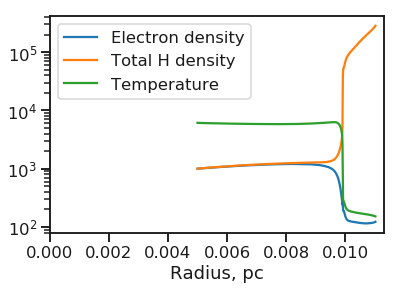

In [44]:
fig, ax = plt.subplots()
ax.plot(r_pc, m.data["ovr"]["eden"], label=r"Electron density")
ax.plot(r_pc, m.data["ovr"]["hden"], label=r"Total H density")
ax.plot(r_pc, m.data["ovr"]["Te"], label=r"Temperature")
ax.legend()
ax.set(xlim=[0, None], yscale='log', xlabel="Radius, pc")

[None, (0, 0.31499993749999999)]

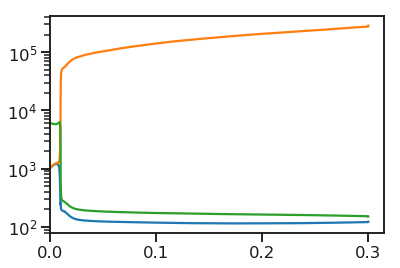

In [45]:
fig, ax = plt.subplots()
ax.plot(AV, m.data["ovr"]["eden"])
ax.plot(AV, m.data["ovr"]["hden"])
ax.plot(AV, m.data["ovr"]["Te"])

ax.set(xlim=[0, None], yscale='log')

Compare the canonical model with the lower density, smaller radius one

[None, (0, 0.018056687074061502), Text(0.5,0,'Radius, pc')]

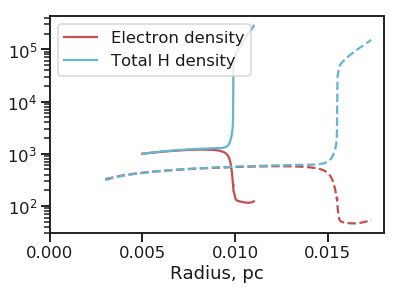

In [48]:
fig, ax = plt.subplots()

ax.plot(r_pc, m.data["ovr"]["eden"], color="r", label=r"Electron density")
ax.plot(r_pc2, m2.data["ovr"]["eden"], color="r", ls="--", label="_nolabel_")

ax.plot(r_pc, m.data["ovr"]["hden"], color="c", label=r"Total H density")
ax.plot(r_pc2, m2.data["ovr"]["hden"], color="c", ls="--", label="_nolabel_")

ax.legend()
ax.set(xlim=[0, None], yscale='log', xlabel="Radius, pc")

So, the low-density one is too low, and hence the i-front is at too large a radius. We need to try ones where we don't change the density so much. 

Look again on a linear scale, with just the pressure.

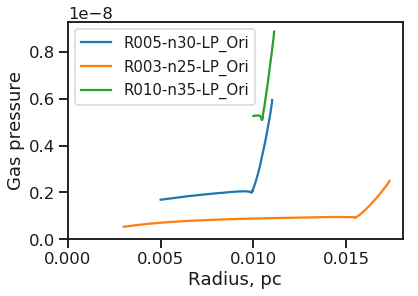

In [59]:
fig, ax = plt.subplots()

def Pgas(ovr_tab):
    return (ovr_tab["eden"] + ovr_tab["hden"])*ovr_tab["Te"]*1.38e-16

ax.plot(r_pc, Pgas(m.data["ovr"]), label=r"R005-n30-LP_Ori")
ax.plot(r_pc2, Pgas(m2.data["ovr"]), label="R003-n25-LP_Ori")
ax.plot(r_pc3, Pgas(m3.data["ovr"]), label="R010-n35-LP_Ori")


ax.legend(loc="upper left", fontsize="small")
ax.set(xlim=[0, None], ylim=[0, None], yscale='linear', xlabel="Radius, pc", ylabel="Gas pressure")
None

## New improved models

Look at each of the new models

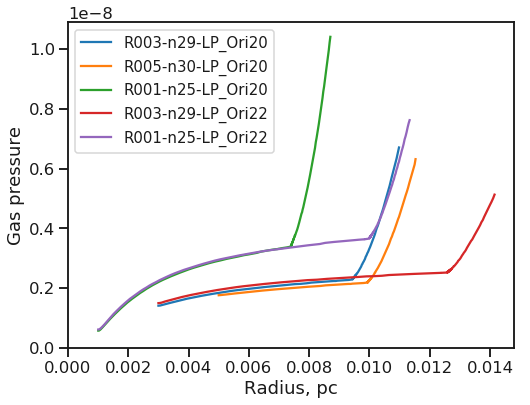

In [97]:
models = ["R003-n29-LP_Ori20", "R005-n30-LP_Ori20", "R001-n25-LP_Ori20", "R003-n29-LP_Ori22", "R001-n25-LP_Ori22"]

fig, ax = plt.subplots(figsize=(8, 6))

for label in models:
    m = cloudytab.CloudyModel(f"models/shell-{label}")
    r_pc = m.data["rad"]["radius"]*u.cm.to(u.pc)
    ax.plot(r_pc, m.data["pre"]["Pgas"], label=label)
    
ax.legend(loc="upper left", fontsize="small")
ax.set(xlim=[0, None], ylim=[0, None], yscale='linear', xlabel="Radius, pc", ylabel="Gas pressure")
None

In [110]:
label = "R003-n29-LP_Ori20"
m = cloudytab.CloudyModel(f"models/shell-{label}")
r_pc = m.data["rad"]["radius"]*u.cm.to(u.pc)
em = m.data["emis"]

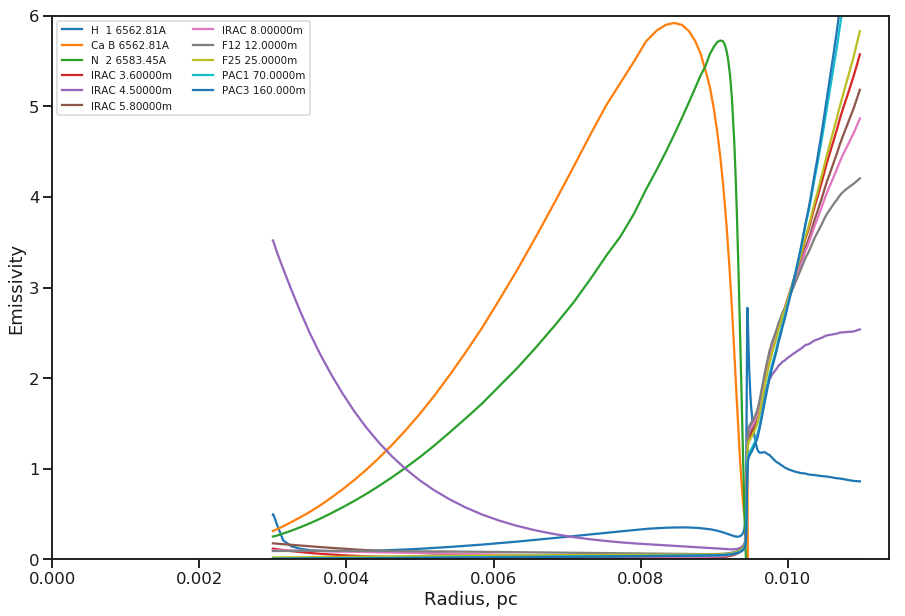

In [111]:
fig, ax = plt.subplots(figsize=(15, 10))
drop_these_bands = "O  3 5006.84A", "nInu 6209.66A", "InwT 6209.66A", "H-CT 6562.81A", "Dest 6562.81A", "Ca A 6562.81A"

for band in em.colnames[1:]:
    if band in drop_these_bands:
        continue
    e = em[band]*(r_pc/0.01)**2
    ax.plot(r_pc, e/np.mean(e), label=band)
    
ax.legend(ncol=2, fontsize="xx-small")
ax.set(xlim=[0, None], yscale='linear', ylim=[0.0, 6.0], xlabel="Radius, pc", ylabel="Emissivity")
None

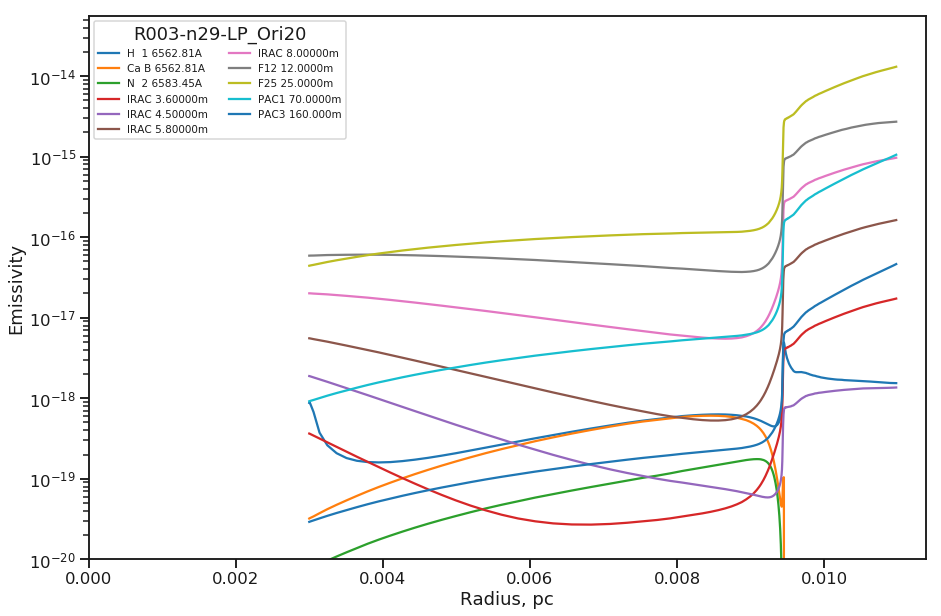

In [112]:
fig, ax = plt.subplots(figsize=(15, 10))
for band in em.colnames[1:]:
    if band in drop_these_bands:
        continue
    e = em[band]*(r_pc/0.01)**2
    ax.plot(r_pc, e, label=band)
    
    
ax.legend(ncol=2, fontsize="xx-small", title=label)
ax.set(xlim=[0, None], yscale='log', ylim=[1e-20, None], xlabel="Radius, pc", ylabel="Emissivity")
None

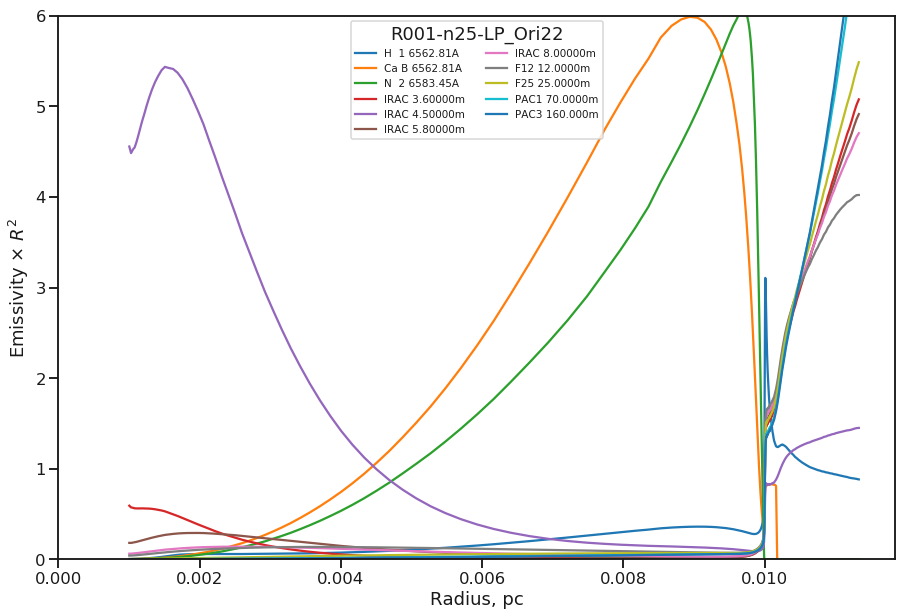

In [109]:
label = "R001-n25-LP_Ori22"
m = cloudytab.CloudyModel(f"models/shell-{label}")
r_pc = m.data["rad"]["radius"]*u.cm.to(u.pc)
em = m.data["emis"]
fig, ax = plt.subplots(figsize=(15, 10))

for band in em.colnames[1:]:
    if band in drop_these_bands:
        continue
    e = em[band]*(r_pc/0.01)**2
    ax.plot(r_pc, e/np.mean(e), label=band)
    
ax.legend(ncol=2, fontsize="xx-small", title=label)
ax.set(xlim=[0, None], yscale='linear', ylim=[0.0, 6.0], xlabel="Radius, pc", ylabel=r"Emissivity $\times\ R^2$")
None

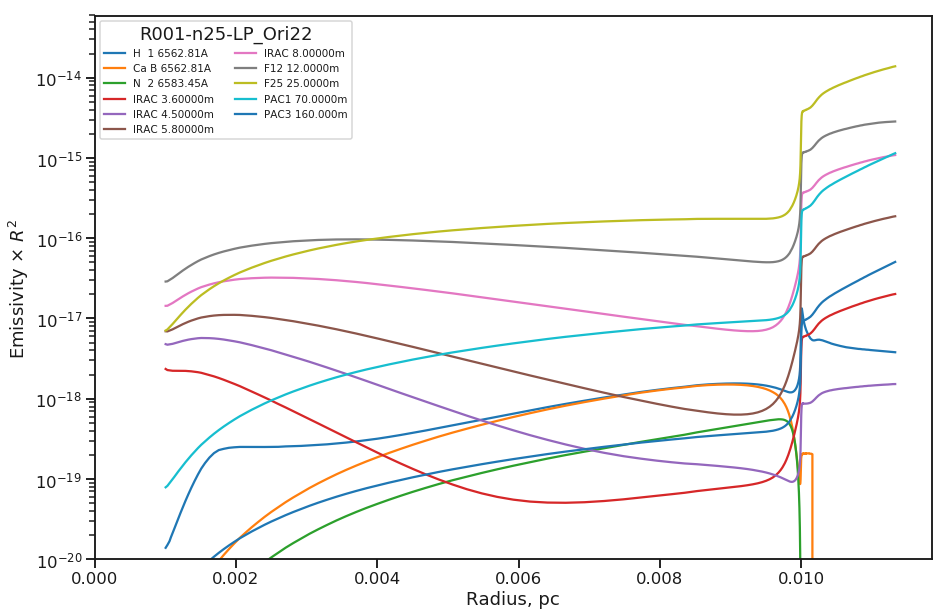

In [107]:
label = "R001-n25-LP_Ori22"
m = cloudytab.CloudyModel(f"models/shell-{label}")
r_pc = m.data["rad"]["radius"]*u.cm.to(u.pc)
em = m.data["emis"]
fig, ax = plt.subplots(figsize=(15, 10))

for band in em.colnames[1:]:
    if band in drop_these_bands:
        continue
    e = em[band]
    ax.plot(r_pc, e*(r_pc/0.01)**2, label=band)
    
ax.legend(ncol=2, fontsize="xx-small", title=label)
ax.set(xlim=[0, None], yscale='log', ylim=[1e-20, None], xlabel="Radius, pc", ylabel=r"Emissivity $\times\ R^2$")
None